<a href="https://colab.research.google.com/github/ayten21/Stable-Diffusion--Beginner-Friendly/blob/main/Stable_Difussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion vasitəsilə şəkillər yaratmaq

Bu notebook [Stability AI's](https://stability.ai/) Stable Diffusion modelindən istifadə edərək necə şəkil yarada biləcəyimizi göstərir. Notebookda modelin Keras implementasiyası istifadə olunub


Kredit:

* [High-performance image generation using Stable Diffusion in KerasCV](https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/) by François Chollet, Luke Wood, and Divam Gupta.
* [A walk through latent space with Stable Diffusion](https://keras.io/examples/generative/random_walks_with_stable_diffusion/) by Ian Stenbit, François Chollet, and Luke Wood.


In [1]:
!pip install tensorflow keras_cv --upgrade --quiet
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.9/634.9 KB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 37.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be DOWNGRADED:
  libcudnn8
0 upgraded, 0 newly installed, 1 downgraded, 1 to remove and 19 not upgraded.
Need to get 430 MB of archives.
After this operation, 1,383 MB disk space will be freed.
Get:1 https://developer.download.

## Generating images

In [2]:
import time
import math
import keras_cv
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image 
from tensorflow import keras
from IPython.display import Image as IImage

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.


GPU-ya çıxışımızın olub olmadığını yoxlamaq üçün:


In [3]:
print("TensorFlow has access to the following devices:")
for device in tf.config.list_physical_devices():
    print(f"• {device}")


TensorFlow has access to the following devices:
• PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
• PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')




```
# This is formatted as code
```

Yaratdığımız şəkilləri tərtib etmək və saxlamaq üçün daha sonra istifadə edəcəyimiz bir neçə köməkçi funksiya.

In [4]:
def plot(images):
    """
    Plots every generated image on the screen.
    """
    plt.figure(figsize=(20, 20))

    for index, image in enumerate(images):
        ax = plt.subplot(1, len(images), index + 1)
        plt.imshow(image)
        plt.axis("off")

def save(image, filename):
    """
    Saves the supplied image to the specified filename.
    """
    im = Image.fromarray(image)
    im.save(filename)

def export_as_gif(images, filename, frames_per_second=10):
    """
    Exports the supplied images as a GIF animation.
    """
    images += images[2:-1][::-1]
    images[0].save(
        filename,
        save_all=True,
        append_images=images[1:],
        duration=1000 // frames_per_second,
        loop=0,
    )

İndi biz Stabil Diffuziya modelini yarada bilərik. Modeli yaradarkən biz yaratmaq istədiyimiz təsvirin ölçülərini təyin edə bilərik. Nəzərə alın ki, 512x512-dən böyük şəkillər yaratmağa çalışsanız, keyfiyyətdə azalma görəcəksiniz.

In [5]:
model = keras_cv.models.StableDiffusion(
    img_width=512, 
    img_height=512
)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


Şəkil yaratmaq üçün etməli olduğumuz şey  `text_to_image()` funksiyasını çağırmaqdan ibarətdir



492466864/492466864 [==============================] - 6s 0us/step


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


198180272/198180272 [==============================] - 3s 0us/step


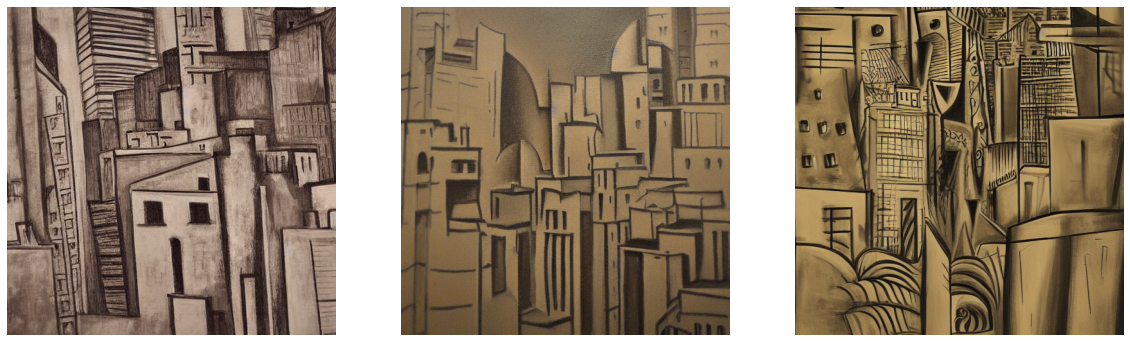

In [6]:
images = model.text_to_image(
    "sepia painting using picasso style, high definition"
    "futuristic city with a lot of buildings",
    batch_size=3
)

plot(images)

25/25 [==============================] - 59s 2s/step


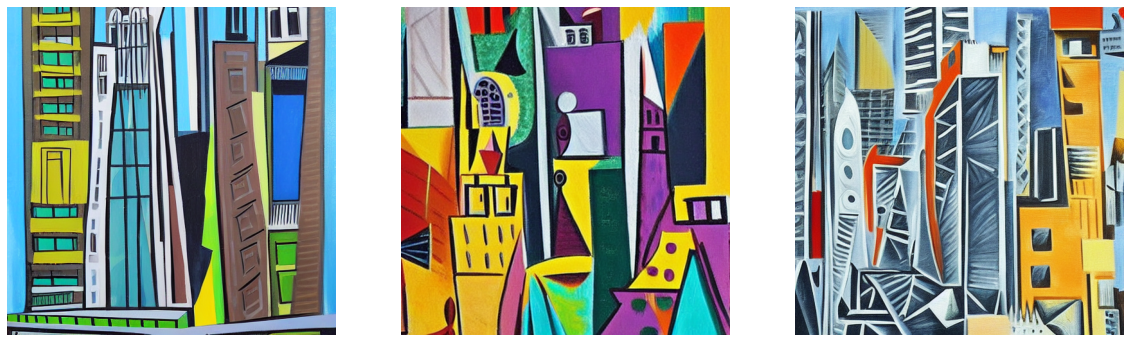

In [ ]:
images = model.text_to_image(
    "painting using picasso style"
    "futuristic city with a lot of buildings",
    batch_size=3
)

plot(images)

Bəyəndiyiniz konkret şəkil varsa, onu diskdə saxlamaq üçün `save()` funksiyasından istifadə edə bilərsiniz.

In [ ]:
save(images[0], "painting.jpg")

## Aşağıdakı nümunə iki mətn sorğusunu kodlayır, onlar arasında interpolasiya edir və həmin nöqtələrdə şəkillər yaradır.



In [7]:
PROMPT1 = "batch of grayscale noise"
PROMPT2 = "cute kitten, vibrant colors, high definition"

# Burada qeyd olunan interpolyasiya addımlarının sayı nə qədər çox olarsa tranzaksiya o qədər səliqəli olar
INTERPOLATION_STEPS = 60

# Animasiyanın hər saniyəsində göstərəcəyimiz kadrların sayı.
FRAMES_PER_SECOND = 24

# Modelin istifadə edəcəyi diffuziya addımlarının sayı. Sayı nə qədər yüksəkdirsə, son şəkil o qədər ətraflı olacaq.
DIFFUSION_STEPS = 25

# Yekun faylın adı
ANIMATION_FILENAME = "animation.gif"

# Random yaradılacaq noise-ı kontrol edən parametr
SEED = 42

In [8]:
# Biz çoxlu şəkillər yaradacağıq, ona görə də onların hamısı üçün 
# eyni random noise hissəsindən istifadə etdiyimizə əmin olmaq istəyirik ki, hamısı oxşar görünsün.
noise = tf.random.normal((512 // 8, 512 // 8, 4), seed=SEED)

# verdiyimiz mətnə əsasən 2 encoded vectorun yaradılması.
encoding1 = tf.squeeze(model.encode_text(PROMPT1))
encoding2 = tf.squeeze(model.encode_text(PROMPT2))

# iki fərqli encodingin arasında interpolyasiya prosesinin icra edilməsi.
interpolated_encodings = tf.linspace(encoding1, encoding2, INTERPOLATION_STEPS)

# encodinglərin GPU üzərində çox yük yaratmamması üçün onları hissələrə bölürük

batch_size = 3
batches = INTERPOLATION_STEPS // batch_size
encodings = tf.split(interpolated_encodings, batches)

animation = []
for batch in range(batches):
    # animasiyada istifadə ediləcək hər bir şəklin yaradılması.
    images = model.generate_image(
        encodings[batch],
        batch_size=batch_size,
        num_steps=DIFFUSION_STEPS,
        diffusion_noise=noise,
    )

    # şəkillərin animasiya halında birləşdirilməsi.
    animation.extend(map(lambda image: Image.fromarray(image), images))
.
export_as_gif(animation, ANIMATION_FILENAME, frames_per_second=FRAMES_PER_SECOND)

IImage(ANIMATION_FILENAME)

25/25 [==============================] - 71s 3s/step
